<a href="https://colab.research.google.com/github/nainag123/sales_data_analysis/blob/main/SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# •	Data is about sales of product in April month in year 2019.
# • It provides data on market prospects, selling difficulties, sales forecasts, and revenue-generating sales activities in addition to information on the best- and worst-performing products and services.
# Content:
# 1)	Order ID
# 2)	Product
# 3)	Ordered Quantity
# 4)	Cost for Each
# 5)	Order Date
# 6)	Order Address


In [ ]:
#importing the data
df = pd.read_csv("Sales_April_2019.csv")

In [ ]:
# first five rows of dataset
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# last five rows of dataset
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"
18382,194094,Lightning Charging Cable,1,14.95,04/18/19 11:08,"354 North St, Boston, MA 02215"


In [ ]:
# defining the number of rows and columns.
df.shape

(18383, 6)

In [ ]:
# finding the sum of null values of every column
print(df.isnull().sum())

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64


Data Pre-Processing

In [ ]:
# checking datatypes and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB
None


Data reading and cleaning



In [ ]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
header = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
dfs=[]
for i in months:
    temp = pd.read_csv('Sales_April_2019.csv'.format(i), index_col = None, header = None, skiprows =1 )
    dfs.append(temp)
df = pd.concat(dfs, axis=0, ignore_index=True)
df.dropna(inplace =True)
df.columns= header
df.drop(df.loc[df['Order ID'] =='Order ID'].index.tolist(), axis=0,inplace=True)

In [ ]:
# Convering the data types and creating new columns to analyze data

from datetime import datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Purchase Address'] = df['Purchase Address'].astype(str)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)



In [ ]:
df['City'] = df['Purchase Address'].str.split(',').str[1].astype(str)
df['Total Price'] = df['Quantity Ordered']* df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Total Price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,11.99


Analyze the data based on products¶


In [ ]:
items = df.groupby('Product').agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean', 'Total Price' : 'sum'})
items

,Quantity Ordered,Price Each,Total Price
Product,,,
20in Monitor,4740,109.99,521352.60
27in 4K Gaming Monitor,6780,389.99,2644132.20
27in FHD Monitor,8844,149.99,1326511.56
34in Ultrawide Monitor,7836,379.99,2977601.64
AA Batteries (4-pack),33864,3.84,130037.76
AAA Batteries (4-pack),35232,2.99,105343.68
Apple Airpods Headphones,18300,150.00,2745000.00
Bose SoundSport Headphones,15456,99.99,1545445.44
Flatscreen TV,5508,300.00,1652400.00


Items sold the most ( quanatity)¶


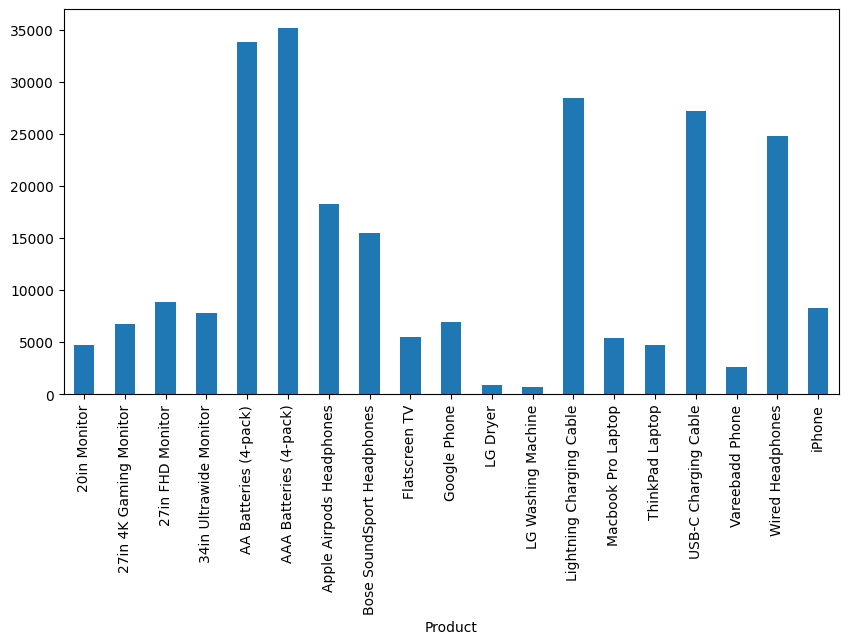

In [ ]:
ax = items['Quantity Ordered'].plot.bar(figsize = (10,5))
